# Part 1 : EDA and data preprocessing

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [3]:
df_walmart = pd.read_csv("Walmart_Store_sales.csv")
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


# First statistics

In [4]:
print(f"Number of rows : {df_walmart.shape[0]}")

Number of rows : 150


In [5]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [6]:
df_walmart.describe(include  = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [7]:
print("Percentage of missing values: ")
display(100 * df_walmart.isna().sum() / df_walmart.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

figures the target variable

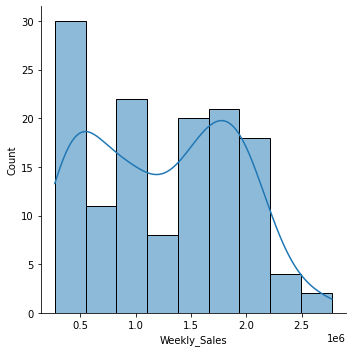

In [8]:
# distribution of Weekly_Sales - the target
sns.displot(df_walmart.Weekly_Sales, kde = True)

In [8]:
df_walmart["Weekly_Sales_log"] = np.log10(df_walmart.Weekly_Sales)
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000,136.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430,6.021669
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173,0.276137
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,5.429638
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500,5.781799
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000,6.100857
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000,6.256811
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,6.442699


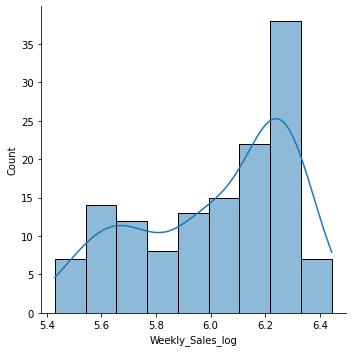

In [9]:
# distribution of Weekly_Sales_log
sns.displot(df_walmart.Weekly_Sales_log, kde = True)

figures with categorical features

In [10]:
# transform the type of Store : float64 ==> object
df_walmart["Store"] = df_walmart["Store"].astype(str)
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store             150 non-null    object 
 1   Date              132 non-null    object 
 2   Weekly_Sales      136 non-null    float64
 3   Holiday_Flag      138 non-null    float64
 4   Temperature       132 non-null    float64
 5   Fuel_Price        136 non-null    float64
 6   CPI               138 non-null    float64
 7   Unemployment      135 non-null    float64
 8   Weekly_Sales_log  136 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.7+ KB


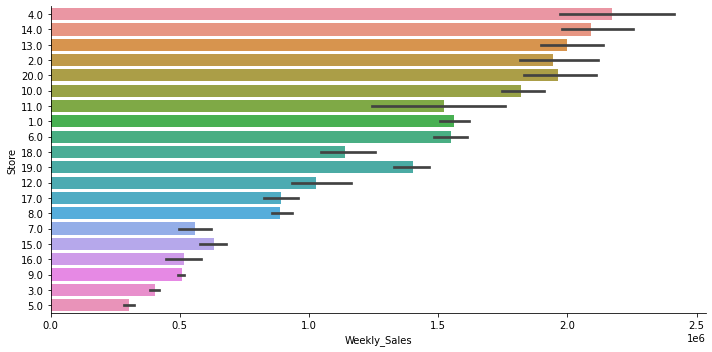

In [11]:
# weekly_sales by type of store
sns.catplot(x="Weekly_Sales",
            y="Store",
            data=df_walmart.sort_values('Weekly_Sales', ascending= False),
            kind="bar",
            height=5,
            aspect=2)

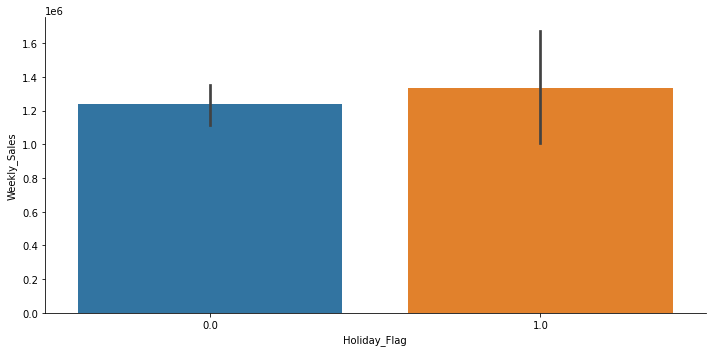

In [12]:
# weekly_sales if Holiday_Flag
sns.catplot(x="Holiday_Flag",
            y="Weekly_Sales",
            data=df_walmart,
            kind="bar",
            height=5,
            aspect=2)

figures with numerical vatiables

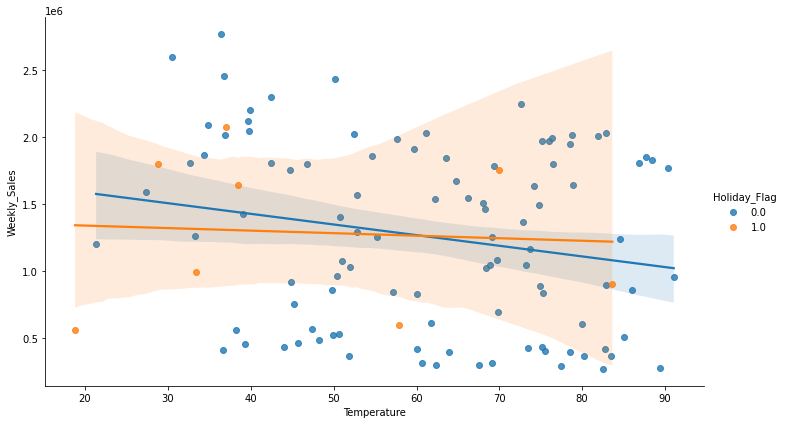

In [21]:
sns.lmplot(x="Temperature",
           y="Weekly_Sales",
           hue="Holiday_Flag",
           data=df_walmart,
           height = 6,
           aspect=10/6)

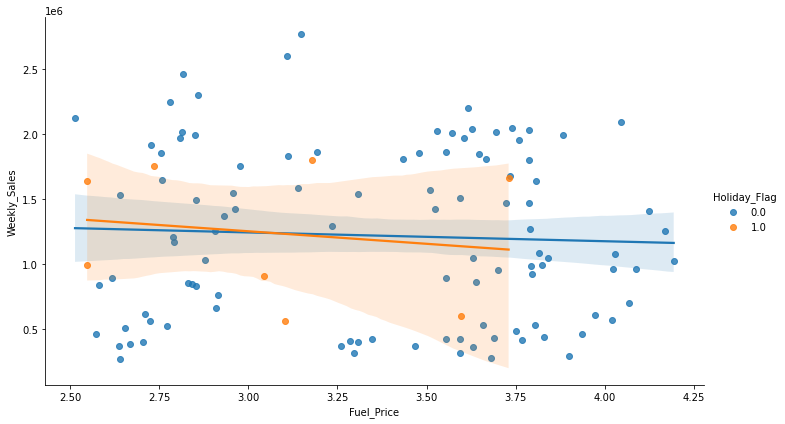

In [22]:
sns.lmplot( x="Fuel_Price",
            y="Weekly_Sales",
            hue="Holiday_Flag",
            data=df_walmart,
            height = 6,
            aspect = 10/6)

(0.0, 3000000.0)

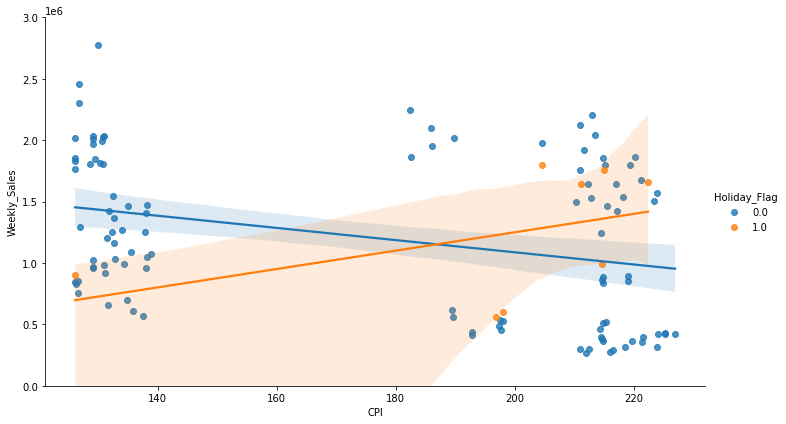

In [28]:

sns.lmplot(x="CPI",
            y="Weekly_Sales",
            hue="Holiday_Flag",
            data=df_walmart,
            height = 6,
            aspect = 10/6)
plt.ylim(0, 3e6)

(0.0, 3000000.0)

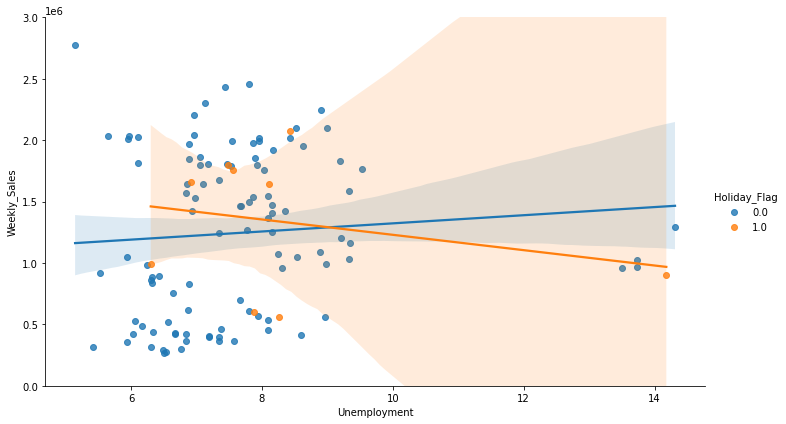

In [29]:

sns.lmplot(x="Unemployment",
            y="Weekly_Sales",
            hue="Holiday_Flag",
            data=df_walmart,
            height = 6,
            aspect = 10/6)
plt.ylim(0, 3e6)

## Preprocessing to be planned with pandas

Drop lines where target values are missing 

In [17]:
df_walmart.drop(columns="Weekly_Sales_log", inplace=True)

Create usable features from the Date column

In [18]:
df_walmart.loc[:1,"Date"]

0    18-02-2011
1    25-03-2011
Name: Date, dtype: object

In [19]:
# transform Date object in datetime
df_walmart.loc[:,"Date"] = pd.to_datetime(df_walmart.loc[:,"Date"],format = "%d-%m-%Y")
df_walmart.loc[:1,"Date"]

0   2011-02-18
1   2011-03-25
Name: Date, dtype: datetime64[ns]

In [20]:
df_walmart.loc[:,"Year"] = df_walmart.loc[:,'Date'].dt.year
df_walmart.loc[:,"Month"] = df_walmart.loc[:,'Date'].dt.month
df_walmart.loc[:,"Day"] = df_walmart.loc[:,'Date'].dt.day
df_walmart.loc[:,"DayOfWeek"] = df_walmart.loc[:,'Date'].dt.dayofweek

Drop lines containing invalid values

In [21]:
df_walmart_clean = df_walmart.dropna(axis=0)
df_walmart_clean.shape

(75, 12)

In [22]:
df_walmart_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0,4.0
7,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0
10,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0


In [23]:
df_walmart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         75 non-null     object        
 1   Date          75 non-null     datetime64[ns]
 2   Weekly_Sales  75 non-null     float64       
 3   Holiday_Flag  75 non-null     float64       
 4   Temperature   75 non-null     float64       
 5   Fuel_Price    75 non-null     float64       
 6   CPI           75 non-null     float64       
 7   Unemployment  75 non-null     float64       
 8   Year          75 non-null     float64       
 9   Month         75 non-null     float64       
 10  Day           75 non-null     float64       
 11  DayOfWeek     75 non-null     float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 7.6+ KB


In [24]:
# Drop columns
drop_cols = ['Date']

print("Dropping useless columns...")
df_walmart_clean = df_walmart_clean.drop(drop_cols, axis=1)

Dropping useless columns...


Drop lines containing outliers

In [25]:
def drop_outliers(df, col):

    """ function with 2 arguments a DataFrame and a string, to remove outliers by columns
        numeric features that don't fall within the range : [mean(X) - 3*std(X) ; mean(X) + 3*std(X)]
    """
    to_keep = ((df[col] < df[col].mean() + 3 * df[col].std()) & (df[col] > df[col].mean() - 3 * df[col].std()))
    df = df.loc[to_keep,:]

    return df

In [26]:
outliers_features = ["Temperature","Fuel_Price", "CPI", "Unemployment"]

for col in outliers_features :
    df_walmart_clean = drop_outliers(df_walmart_clean, col)

In [27]:
df_walmart_clean

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0,4.0
7,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0
10,8.0,895066.50,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
139,7.0,532739.77,0.0,50.60,3.804,197.588605,8.090,2012.0,5.0,25.0,4.0
143,3.0,396968.80,0.0,78.53,2.705,214.495838,7.343,2010.0,6.0,4.0,4.0
144,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,2012.0,10.0,19.0,4.0
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,18.0,4.0


In [28]:
df_walmart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         71 non-null     object 
 1   Weekly_Sales  71 non-null     float64
 2   Holiday_Flag  71 non-null     float64
 3   Temperature   71 non-null     float64
 4   Fuel_Price    71 non-null     float64
 5   CPI           71 non-null     float64
 6   Unemployment  71 non-null     float64
 7   Year          71 non-null     float64
 8   Month         71 non-null     float64
 9   Day           71 non-null     float64
 10  DayOfWeek     71 non-null     float64
dtypes: float64(10), object(1)
memory usage: 6.7+ KB


Preprocessings to be planned with scikit-learn

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [30]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = df_walmart_clean.loc[:,target_name]
X = df_walmart_clean.drop(target_name, axis = 1) # All columns are kept, except the target

Separating labels from features...


In [31]:
# First : always divide dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Dividing into train and test sets...


In [32]:
#  numeric features
numeric_features = ["Temperature","Fuel_Price", "CPI", "Unemployment", "Year", "Month", "Day", "DayOfWeek"] # Names of numeric columns in X_train/X_test
scaler =StandardScaler()

# categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
onehot = OneHotEncoder(drop='first', handle_unknown='ignore') # first column will be dropped to avoid creating correlations between features


In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', onehot, categorical_features)
    ])

In [34]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test)

c:\Users\sylva\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Part 2 : Baseline model (linear regression)

In [57]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [38]:
# Print scores

############## verifier la metrique ##################

### R2  ==> ok ####

print("Accuracy on training set : ", model.score(X_train, Y_train)) 
print("Accuracy on test set : ", model.score(X_test, Y_test))

Accuracy on training set :  0.984296984933686
Accuracy on test set :  0.17111056403931268


In [58]:
model.coef_

array([-5.30071730e+04, -9.02470781e+04,  5.34906791e+05, -6.33488465e+04,
        4.03620364e+03,  3.89552083e+04, -4.89168050e+04, -6.51925802e-09,
        1.99293055e+05,  1.58829411e+06,  1.03303662e+06,  2.34037743e+05,
       -8.50601266e+05,  2.35313589e+05,  5.91273181e+05,  9.52501845e+05,
        2.04281984e+05,  4.82343889e+05, -1.31616840e+06,  1.73289861e+06,
       -1.36150080e+06,  1.22234217e+05, -7.76417152e+05, -8.21325224e+05,
       -1.32414578e+06, -1.20584995e+05])

In [39]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_2.0', 'Store_20.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Holiday_Flag_1.0']


In [48]:
# Create a pandas DataFrame
feature_coefficients = pd.DataFrame(index = column_names, data = model.coef_, columns=["feature_coef"])
feature_coefficients = feature_coefficients.sort_values(by = 'feature_coef')
feature_coefficients

,feature_coef
Store_5.0,-1.361501e+06
Store_9.0,-1.324146e+06
Store_3.0,-1.316168e+06
Store_16.0,-8.506013e+05
Store_8.0,-8.213252e+05
Store_7.0,-7.764172e+05
Holiday_Flag_1.0,-1.205850e+05
Fuel_Price,-9.024708e+04
Unemployment,-6.334885e+04
Temperature,-5.300717e+04


In [44]:
import plotly.express as px

In [49]:

# Plot coefficients
fig = px.bar(feature_coefficients, orientation = 'v')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

# Part 3 : Fight overfitting

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [64]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.5276190566082583
The standard deviation is :  0.13925909949938522


In [117]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.001}
Best R2 score :  0.8254946319926351


In [118]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.9842504021495574
R2 score on test set :  0.5533694691723251


In [67]:
from sklearn.linear_model import Lasso

In [120]:
# Perform grid search
print("Grid search...")
lasso = Lasso(tol = 1e-2)
# Grid of values to be tested
params = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
}
gridsearch = GridSearchCV(lasso, param_grid = params, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.001}
Best R2 score :  0.8079123529977622


In [121]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.982944711544893
R2 score on test set :  0.9284766565416898
